# Pymkm demo: CO2 hydrogenation to MeOH over Pd-In2O3 catalyst

## MKM class import, object instance and attributes overview

In [4]:
import os, sys
sys.path.insert(0, "../") 

import numpy as np

from mkm import MKM

In [5]:
model = MKM('Pd-In2O3', 'rm.mkm', 'g.mkm', t_ref=553)

# Model exploration
To investigate the characteristics of the system under study, several attributes can be easily inspected to check general information like number of elementary reactions, energetics, reaction network, etc.

In [24]:
print(model)

System: Pd-In2O3

CO2 + 3H2 -> CH3OH + H2O
CO2 + H2 -> CO + H2O

Number of global reactions: 2
Number of elementary reactions: 20
Number of surface species: 17
Number of gas species: 5



# Barriers note

The barrieres here provided does not correspond to real DFT simulations. These are only random numbers used as example.

In [25]:
model.dh_barrier  # [eV] height of the barrier

array([0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.56, 0.  , 1.82, 0.  , 0.  ,
       1.77, 0.  , 0.68, 1.17, 0.35, 1.14, 1.15, 1.86, 0.49])

In [26]:
model.df_gibbs # Gibbs free energy of the elementary reactions

,,DGR / eV,G_act / eV,"G_act,rev / eV"
R1,ads,0.09,0.09,0.00
R2,ads,0.36,0.36,0.00
R3,ads,0.27,0.27,0.00
R4,ads,-0.00,0.00,0.00
R5,sur,-0.35,0.92,1.27
R6,ads,-0.41,0.00,0.41
R7,sur,0.78,1.55,0.77
R8,sur,0.10,0.10,0.00
R9,sur,1.80,1.80,0.00
R10,sur,-0.92,0.00,0.92


In [27]:
model.df_system  # Stoichiometric matrix of the reaction

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20
,ads,ads,ads,ads,sur,ads,sur,sur,sur,sur,ads,sur,des,sur,sur,des,sur,sur,des,des
species,,,,,,,,,,,,,,,,,,,,
i15,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
i16,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
i17,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
i18,0,0,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0
i20,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
i21,0,0,0,0,0,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0
i22,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
i23,0,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0


In [28]:
model.stoich_numbers

array([[ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.5,  0. ],
       [ 0.5,  0. ],
       [ 0.5,  0. ],
       [ 0.5,  0. ],
       [ 1. , -0. ],
       [ 1. , -0. ],
       [ 1. , -0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. , -0. ],
       [-0. ,  1. ],
       [-0. ,  1. ],
       [-0. ,  1. ],
       [-0. ,  1. ]])

## Thermodynamic consistency analysis

A often overlooked aspect in microkinetic models is its thermodynamic consistency: although we are dealing with catalysis, a kinetic phenomenon, it is strictly bound to thermodynamic constraints. Currently, pymkm allows a quantitative estimation of thermodynamic consistency of microkinetic models: this is done comparing directly the equilibrium constants of the global reaction we are studying with the global constants built from the elementary reactions proposed in the reaction network. This can be easily done using the MKM.thermodynamic_consistency() method, that needs as input only the temperature at which we want to perform the analysis.

In [29]:
model.thermodynamic_consistency(553)

 Pd-In2O3: Thermodynamic consistency analysis
 Temperature = 553 K

----------------------------------------------------------------------------------

CO2 + 3H2 -> CH3OH + H2O
Model:    DHR=-1.18e+02 kJ/mol    DSR=-2.77e-01 kJ/mol/K     DGR=1.47e+04 kJ/mol
Database: DHR=-6.39e+01 kJ/mol    DSR=-2.04e-01 kJ/mol/K     DGR=4.87e+01 kJ/mol

Model:    keqH=1.31e+11    keqS=3.23e-15    Keq=4.25e-04
Database: keqH=1.09e+06    keqS=2.33e-11    Keq=2.53e-05
----------------------------------------------------------------------------------

CO2 + H2 -> CO + H2O
Model:    DHR=6.85e+01 kJ/mol    DSR=1.92e-02 kJ/mol/K     DGR=-9.56e+02 kJ/mol
Database: DHR=3.93e+01 kJ/mol    DSR=3.74e-02 kJ/mol/K     DGR=1.87e+01 kJ/mol

Model:    keqH=3.38e-07    keqS=1.01e+01    Keq=3.40e-06
Database: keqH=1.93e-04    keqS=8.99e+01    Keq=1.73e-02
----------------------------------------------------------------------------------



It is easy to observe from the generated report that the model is not thermodynamically consistent, both at enthalpic and entropic level, as the equilibrium constants of the global reactions calculated with DFT are order of magnitude different from the values extracted from the thermochemistry database. However, considering the MeOH reaction, observing the equilibrium constant one could think the gap is not so huge: this is due to the fact that enthalpy and entropy constants compensate each pther in the opposite direction, "canceling" the discrepancy between database and DFT-derived equilibrium constants.

## Step 2: microkinetic model single run

In [30]:
model.grl  # Dictionary providing the index of the elementary reaction defining the global reaction rate 

{'MeOH': 15, 'RWGS': 18}

In [31]:
exp = model.kinetic_run(573, 5e6, [0.8,0.2,0,0,0])

Pd-In2O3: Microkinetic run
Reactor model: Differential PFR
Temperature = 573K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

MeOH Reaction Rate: 2.15e-01 1/s
MeOH Selectivity: 90.42%
Most Abundant Surface Intermediate (MASI): i21 Coverage: 86.23% 
CPU time: 5.88 s


In [32]:
exp.keys()

dict_keys(['T', 'P', 'y_in', 'y_out', 'theta', 'ddt', 'r', 'r_MeOH', 'r_RWGS', 'conversion', 'S_MeOH', 'MASI', 'solver'])

In [33]:
exp["S_MeOH"]

0.9042376667956817

In [34]:
exp["ddt"]

{'i15': 2.7755575615628914e-17,
 'i16': 5.551115123125783e-17,
 'i17': -4.458781434346637e-18,
 'i18': 6.938893903907228e-16,
 'i20': 2.7755575615628914e-17,
 'i21': -4.505679163102627e-11,
 'i22': 1.6169843242153092e-12,
 'i23': -1.0842021724855044e-19,
 'i24': -1.6126113031728062e-12,
 'i25': 4.45919134950401e-11,
 'i26': 0.0,
 'i27': -1.4035994588823542e-13,
 'i28': 5.998257446293564e-13,
 'i29': 0.0,
 'i35': 0.0,
 'i38': 2.1510571102112408e-16,
 'i39': 1.0408340855860843e-17,
 'H2(g)': 0.0,
 'CO2(g)': 0.0,
 'H2O(g)': 0.0,
 'CH3OH(g)': 0.0,
 'CO(g)': 0.0}

In [35]:
exp['r_RWGS']

0.022799307019961797

## Step 3: Apparent activation energy

In [36]:
model.reactor_model

'differential'

Pd-In2O3: Apparent activation energy for MeOH reaction

Temperature range: 523-553K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

Temperature = 523K    CPU Time: 5.75s
Temperature = 543K    CPU Time: 5.73s
Temperature = 563K    CPU Time: 5.76s


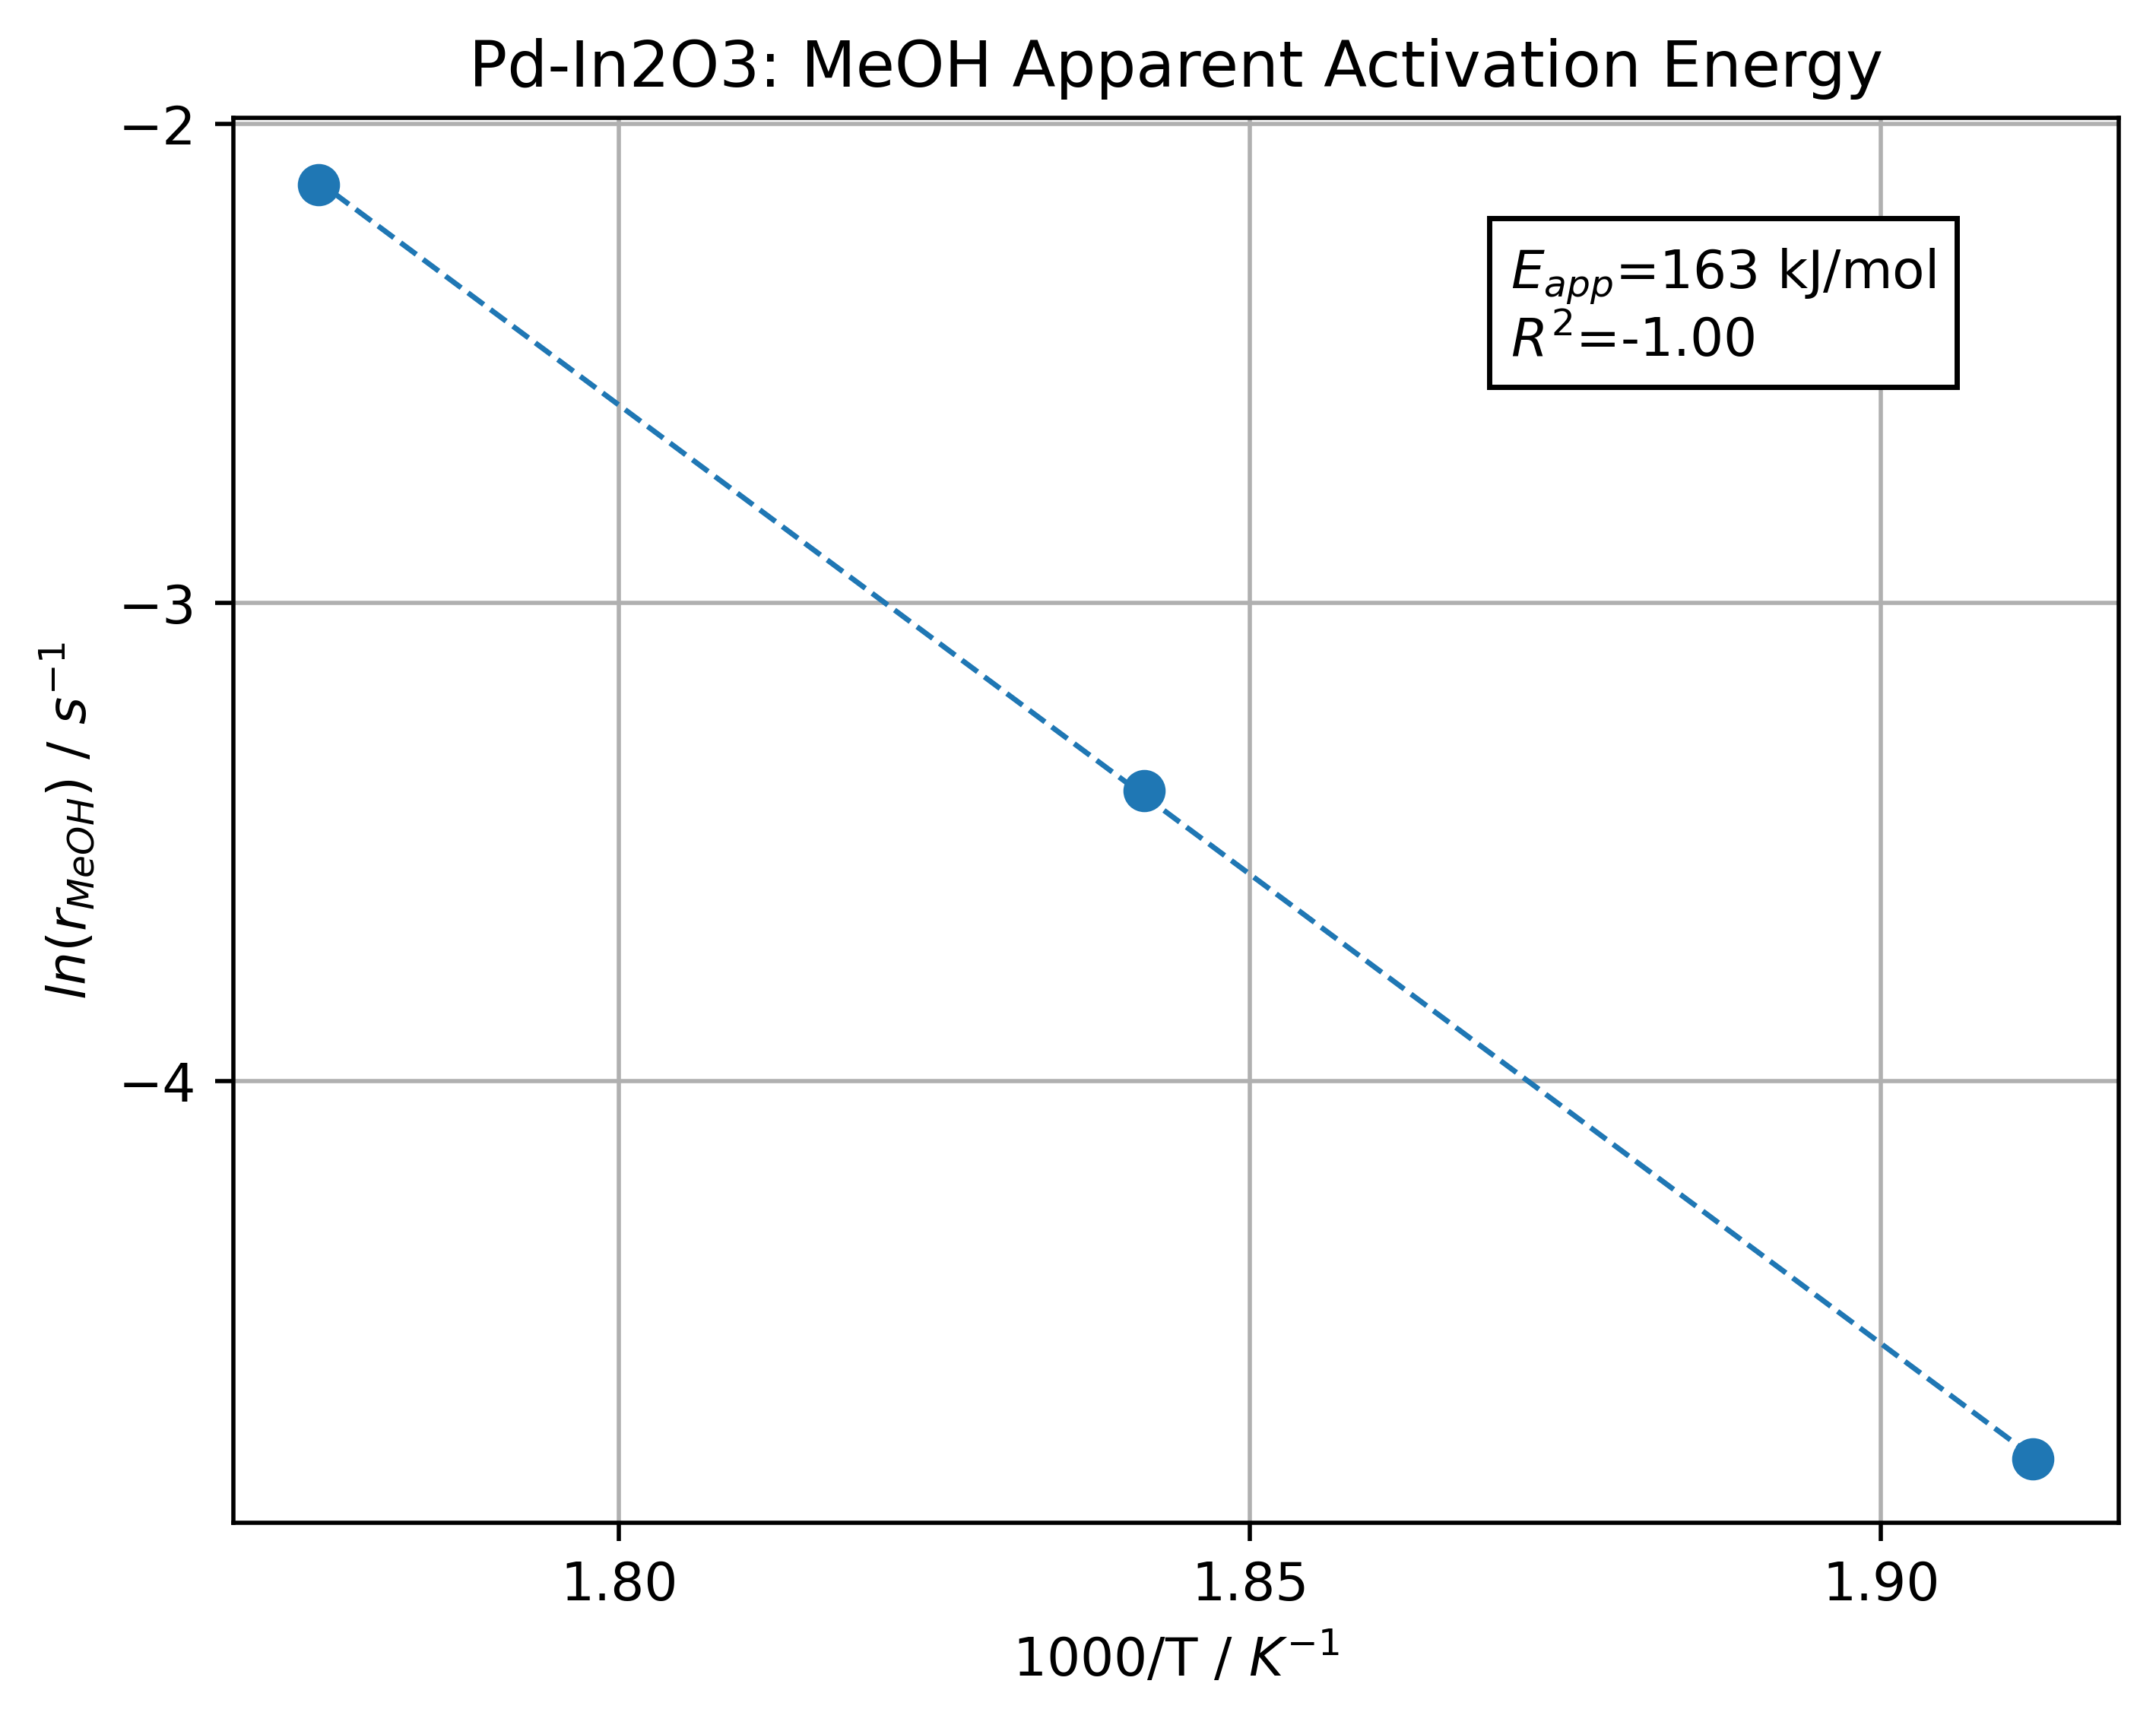

In [37]:
Eapp = model.apparent_activation_energy([523,573,20], 5e6, [0.8,0.2,0,0,0], 'MeOH')

In [38]:
print(Eapp)

{'Tmin': 523, 'Tmax': 563, 'N': 3, 'P': 50.0, 'y_gas': {'H2(g)': 0.8, 'CO2(g)': 0.2, 'H2O(g)': 0, 'CH3OH(g)': 0, 'CO(g)': 0}, 'Eapp_MeOH': 162.9434435665556, 'R2': -0.9999735051670947}


## Step 4: Apparent reaction orders

In [6]:
composition_matrix = np.array([[0.78,0.22,0,0,0],[0.8,0.2,0,0,0],[0.82,0.18,0,0,0]])

In [7]:
napp_H2 = model.apparent_reaction_order(573, 5e6, composition_matrix, 'CO2', 'MeOH')

Pd-In2O3: CO2 Apparent reaction order for MeOH reaction

Temperature = 573K    Pressure = 50.0bar

y_CO2 = 0.22    CPU Time: 6.01s
y_CO2 = 0.20    CPU Time: 5.90s
y_CO2 = 0.18    CPU Time: 5.77s


ValueError: Expected 2D array, got 1D array instead:
array=[13.91082074 13.81551056 13.71015004].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
napp_H2

## Descriptor search: Reversibility analysis

In [ ]:
rev = model.reversibility(573, 5e6, [0.8,0.2,0,0,0])

In [ ]:
rev

## Rate-determining step search: Degree of rate and selectivity control

In [ ]:
output = model.drc_full(573, 5e6, [0.8,0.2,0,0,0], "MeOH")

In [ ]:
output[0]

# Dynamic CSTR

If someone is interested in extracting also values related to conversion and yield, the differential model is not suitable for the purpose. In order to obtain this information, a macroscopic reactor model (i.e., able to provide information about the conversion) is needed. MKM provides the dynamic CSTR model as macroscopic model. In order to use it, the reactor switch must be turned on and information about the reactor set-up must be defined.

In [ ]:
model.set_reactor('dynamic')
model.set_CSTR_params(radius=0.0022,
                      length=0.0022*10,
                      Q=0.66E-6,
                      S_BET=1.74E5,
                      m_cat=1.0E-4)

In [ ]:
x = model.kinetic_run(553, 5e6, [0.8,0.2,0,0,0])

In [ ]:
x.keys()

In [ ]:
x['MASI']

In [ ]:
x['r_RWGS']

In [ ]:
x['r_MeOH']

In [ ]:
x['conversion']

In [ ]:
x['y_out']